# OWCsim-Py: Geometry-Bases

authors: ardimasp

In [1]:
# Print timestamp
import datetime
now = datetime.datetime.now()

print("date:{}".format(now))

date:2019-05-14 01:10:50.364926


## Introduction

In this notebook, we will go through what basic geometry objects that have been implemented in `OWCsim-Py 0.0.1`. We are going to go through this notebook very quickly as they seem trivial and do not need much explanation. 

## Libraries

Necessary libraries for this notebook.

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from owcsimpy.geoutils.draw import draw
from owcsimpy.geoobjects.bases.vector_py import Vector_py as Vector
from owcsimpy.geoobjects.bases.paramline_py import ParamLine_py as Line
from owcsimpy.geoobjects.bases.circle_py import Circle_py as Circle
from owcsimpy.geoobjects.bases.rectplane_py import RectPlane_py as RectPlane
from owcsimpy.geoobjects.bases.cube_py import Cube_py as Cube


## Vector

There are two ways of constructing a vector, namely by defining (1) its spherical coordinates and (2) its Cartesian coordinates.

### By spherical coordinates

<IPython.core.display.Javascript object>


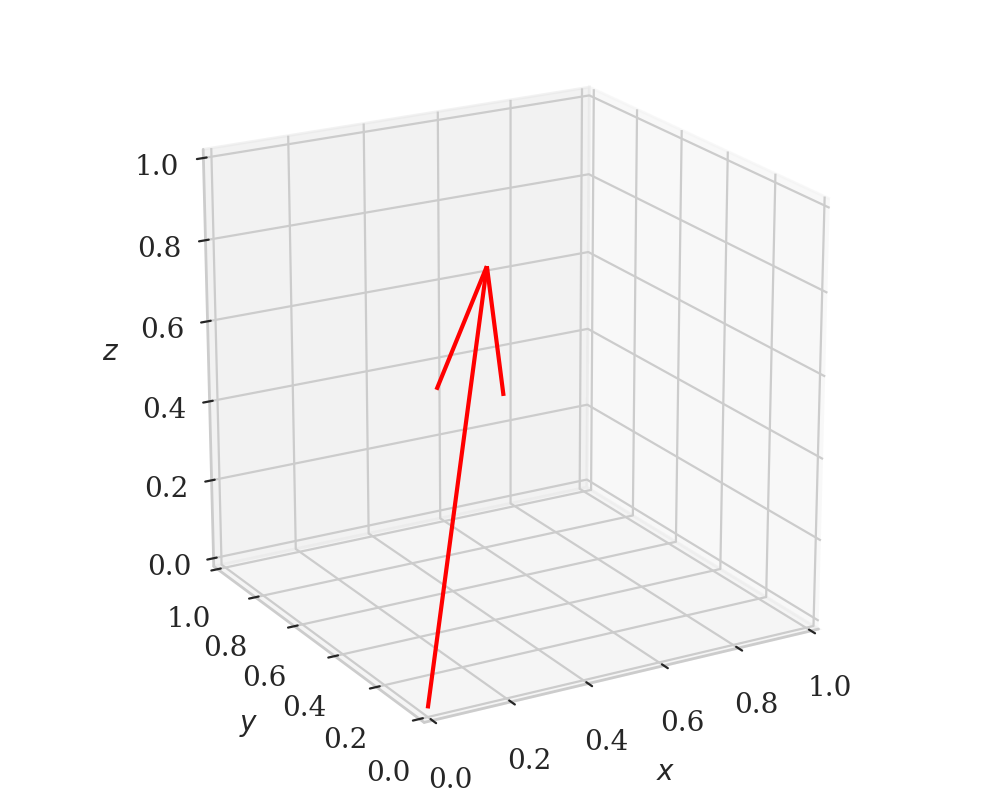

In [4]:
r = 1 # radius
polar = np.deg2rad(30) # polar angle
azimuth = np.deg2rad(45) # azimuth angle
v = Vector(np.array([r,polar,azimuth]),which='spherical')

fig,ax = draw(vectors=v,figsize=(5,4),
              azim=-120,elev=20)


### By Cartesian coordinates

<IPython.core.display.Javascript object>


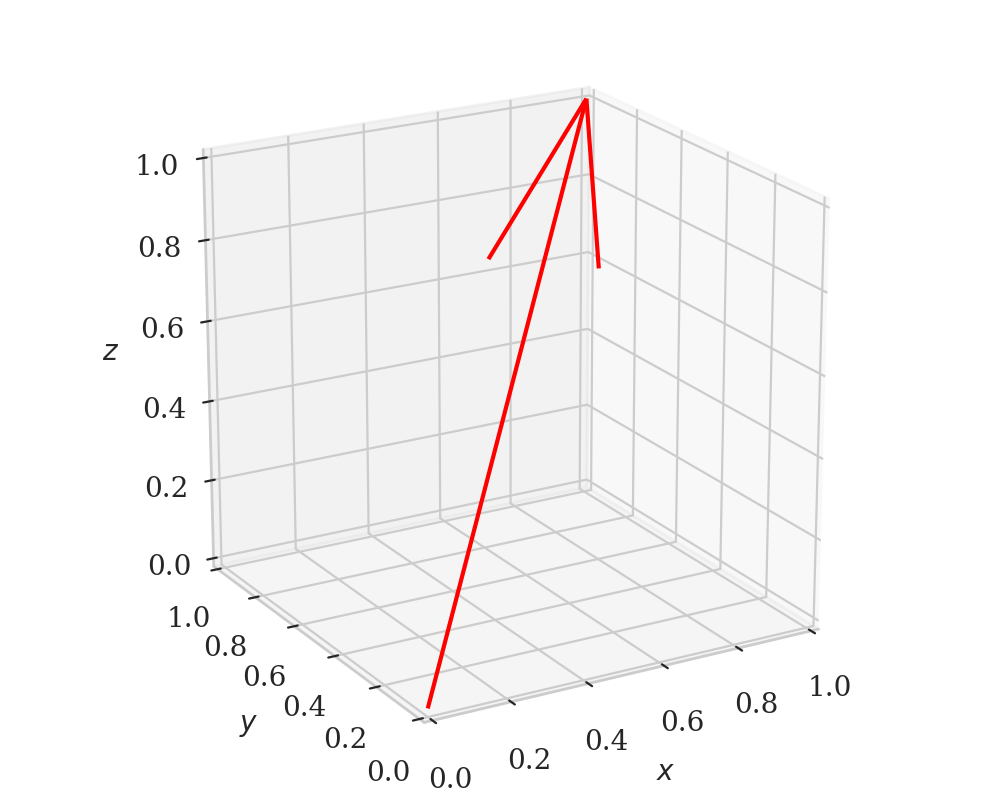

In [5]:
x,y,z = [1,1,1] # Cartesian coordinates
v = Vector(np.array([x,y,z]),which='cartesian')

fig,ax = draw(vectors=v,figsize=(5,4),
              azim=-120,elev=20)

### Misc

We can also rotate and shift the vector and shift the reference point from origin.

<IPython.core.display.Javascript object>


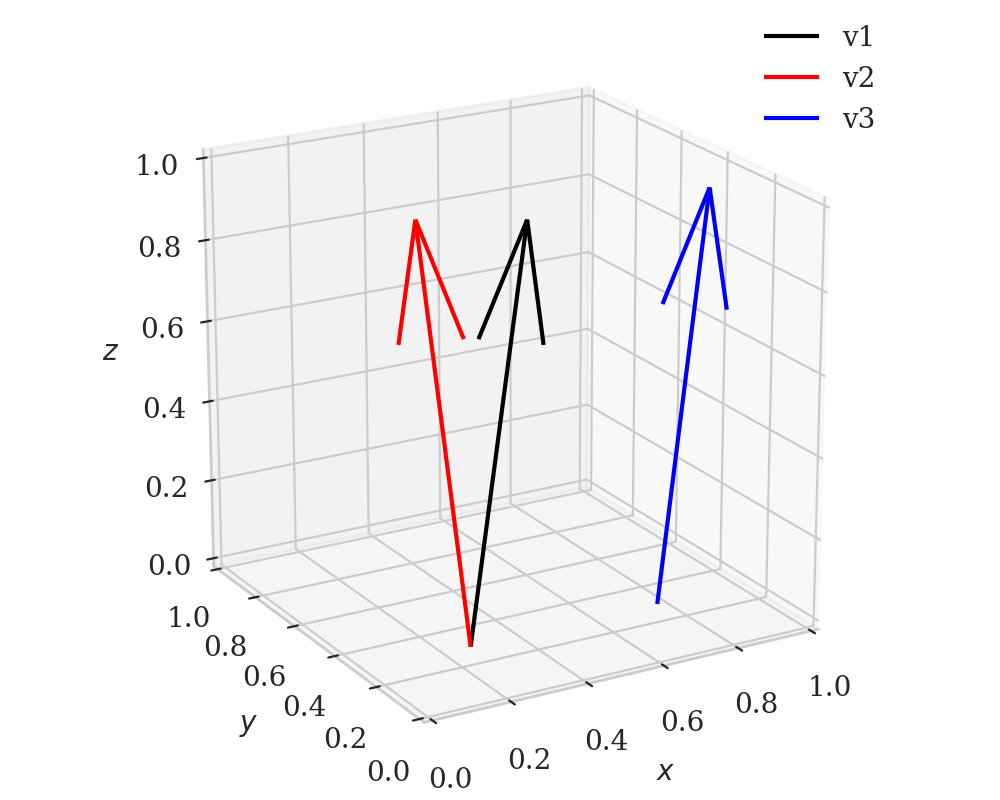

In [6]:
v1 = Vector(np.array([r,polar,azimuth]),refPoint=np.array([0.25,0.25,0]),which='spherical')
# Normalize length and rotate
v2 = v1.normalize().rotate(theta=np.deg2rad(30),refVector=np.array([0,0,1]))
# Translate
v3 = v1.translate(v1.refPoint+np.array([0.5,0,0]))
# Draw
fig,ax = draw(vectors=[v1,v2,v3],colors=['black','red','blue'],
              figsize=(5,4),azim=-120,elev=20)

ax.legend(['v1','v2','v3']);

## Parametric Line

A parametric line is defined based on its starting poing ($P_0$) and end point ($P_1$):

$l(t) = P_0 + \mathbf{u} t, \mathrm{where}\ \mathbf{u} = P_1-P_0$.

An important method of the paramatric line is to get a point at $t=t_0$.

<IPython.core.display.Javascript object>


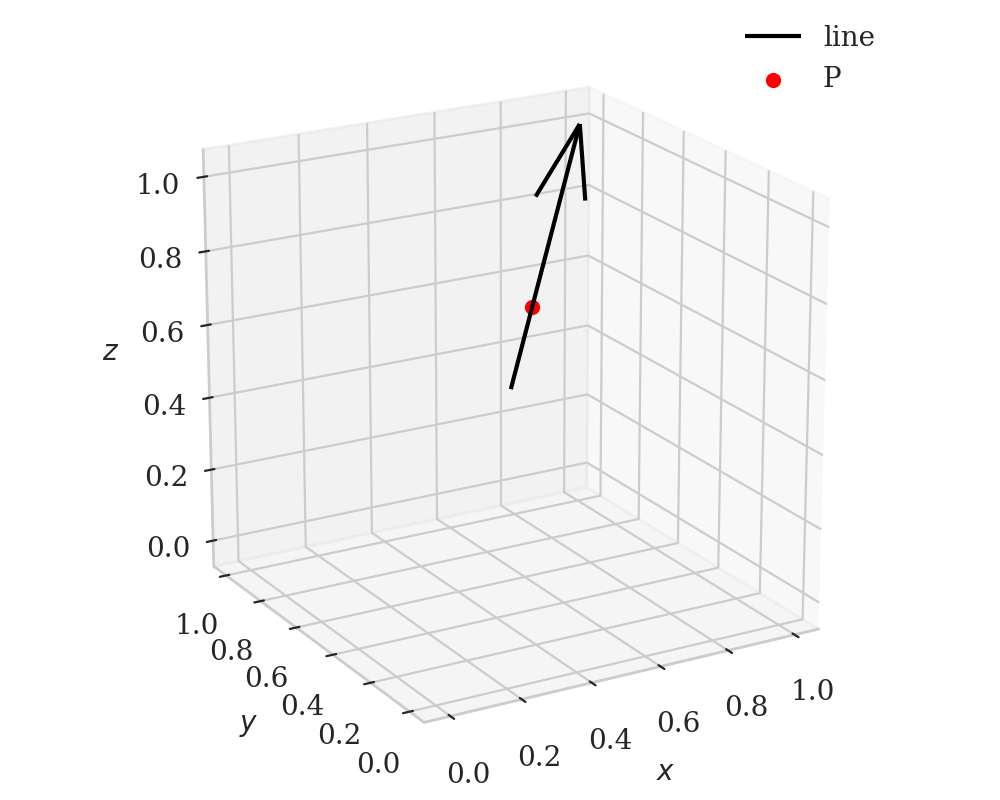

In [7]:
startPt = np.array([0.5,0.5,0.5])
endPt = np.ones(3)
# Parametric line
l = Line(startPt,endPt)
# Draw
fig,ax = draw(lines=l,figsize=(5,4),azim=-120,elev=20)

# Get a point at t=t0
t0 = 0.3
P = l.getPoint(t0)

ax.scatter(*P,color='red');

ax.legend(['line','P']);

## Circle

Circle is mostly used to model a PD. It is defined by its normal vector, center point and radius.

<IPython.core.display.Javascript object>


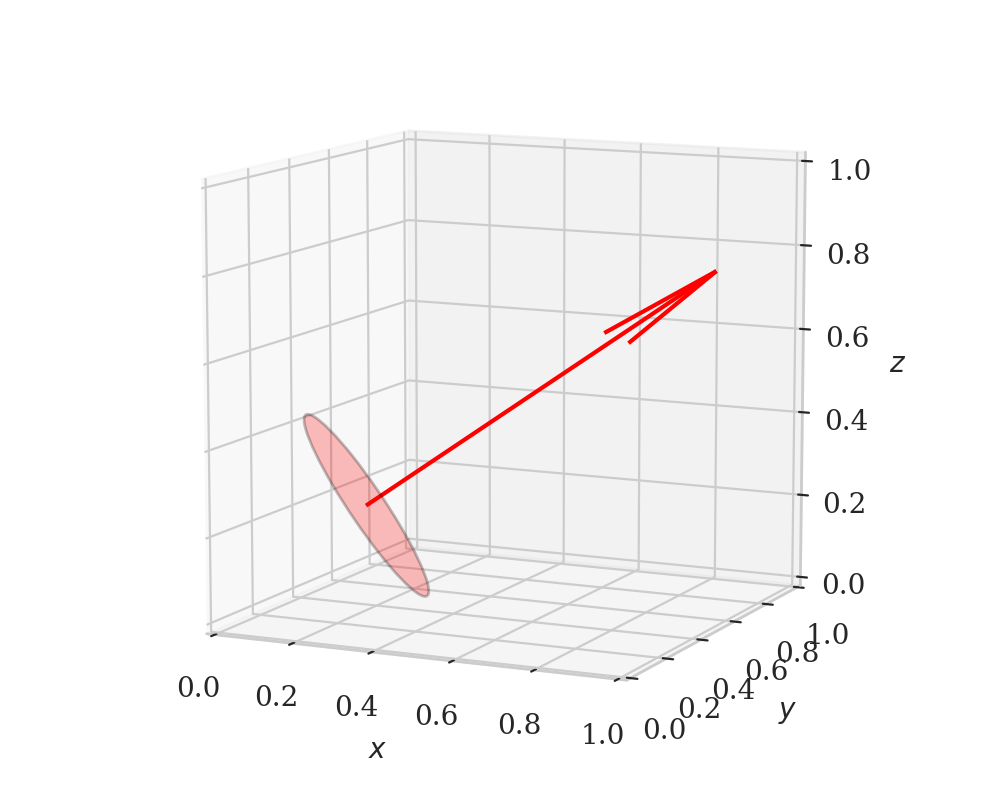

In [8]:
# normal vector
normalVect = Vector(np.array([1,np.deg2rad(60),np.deg2rad(45)]))
# center point
ctrPoint = np.array([0.25,0.25,0.25])
# radius
radius = 0.25

circle = Circle(normalVect,ctrPoint,radius=0.25)

fig,ax = draw(circles=circle,
             figsize=(5,4),azim=-65,elev=10)


## Rectangular Plane

A rectangular plane is basically defined by its 4 vertices. However, it is difficult to the vertices from the start. Therefore, we need another way to construct it. It is easier if we could define it based on its normal vector and its dimensions. 

<IPython.core.display.Javascript object>


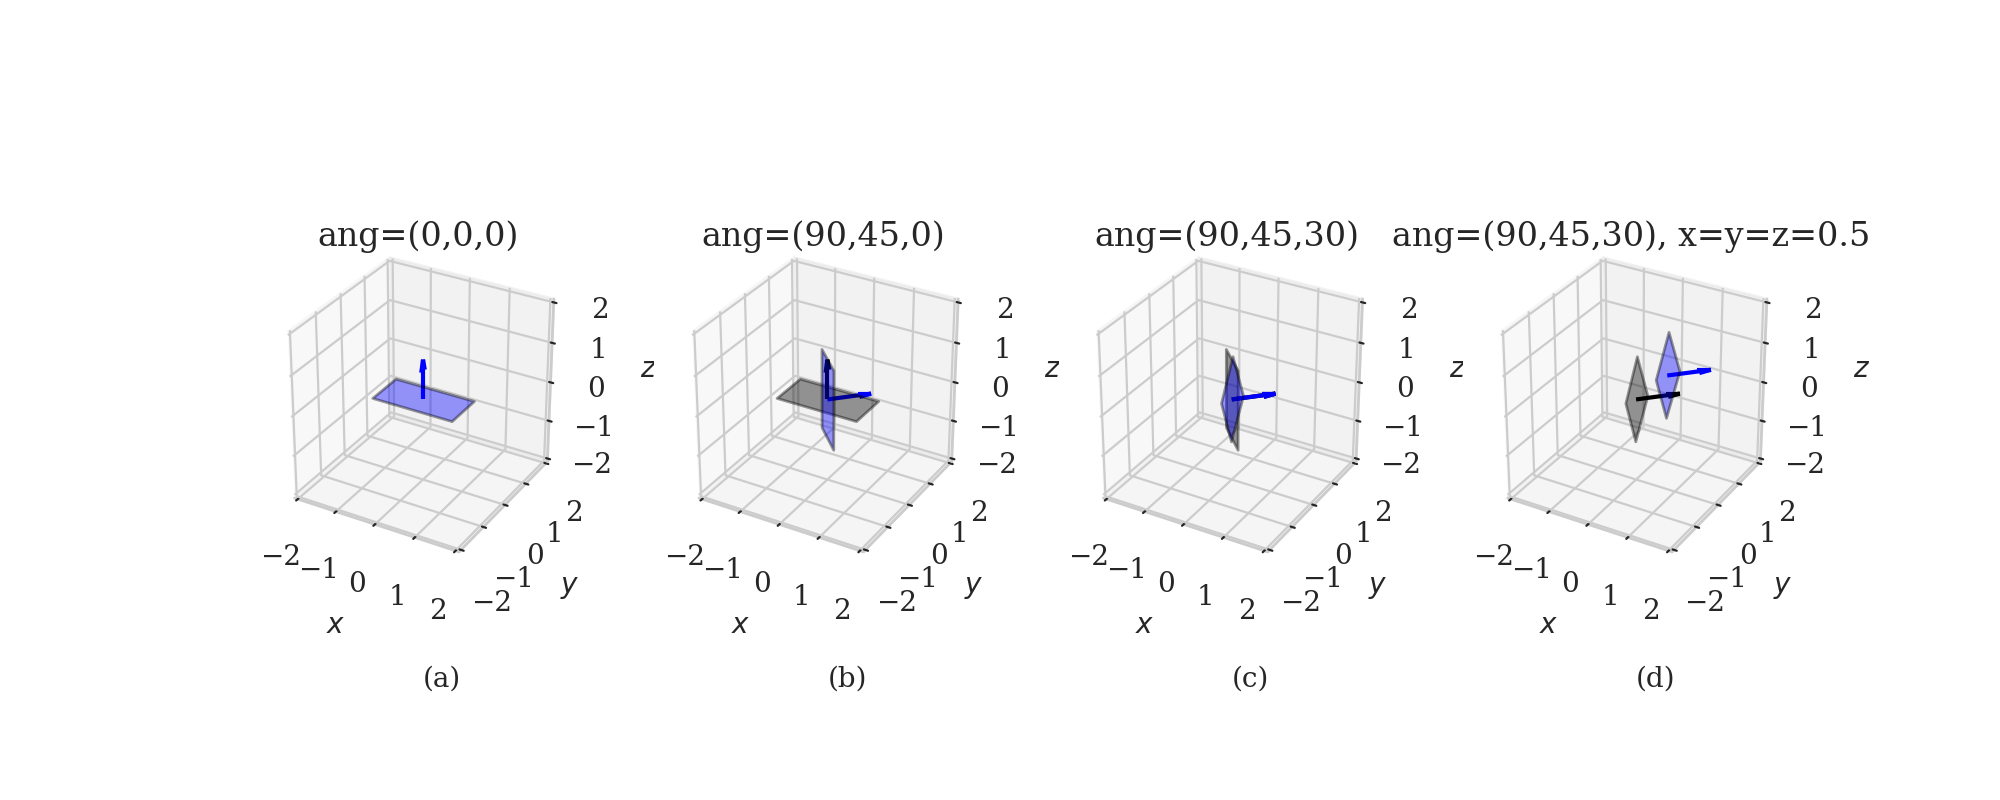

In [9]:
def genPlane(polar,az,Rod,translation):
    
    v = Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)]))
    ctrPoint=np.array(3*[translation])
    plane = RectPlane(normalVect=v,ctrPoint=ctrPoint,
        RodriguesAngle=np.deg2rad(Rod),dimensions=[2,1])

    return plane


# Will draw 4 different canvases
fig,axs = draw(subplots=True,figsize=(10,4),nrows=1,ncols=4,xlim=[-2,2],ylim=[-2,2],zlim=[-2,2])

# Original position
polar,az,Rod=0,0,0 # polar, azimuth, Rodrigues
translation=0
plane = genPlane(polar,az,Rod,translation)

fig,axs[0] = draw(figure=fig,axes=axs[0],planes=plane,colors='blue',facecolors='blue')
axs[0].set_title("ang=({},{},{})".format(polar,az,Rod))

# Polar and azimuth
# Copy previous object as a reference (black)
fig,axs[1] = draw(figure=fig,axes=axs[1],planes=plane,colors='black',facecolors='black')

polar,az,Rod=90,45,0 # polar, azimuth, Rodrigues
translation=0
plane = genPlane(polar,az,Rod,translation)

fig,axs[1] = draw(figure=fig,axes=axs[1],planes=plane,colors='blue',facecolors='blue')
axs[1].set_title("ang=({},{},{})".format(polar,az,Rod))

# Rodrigues
# Copy previous object as a reference (black)
fig,axs[2] = draw(figure=fig,axes=axs[2],planes=plane,colors='black',facecolors='black')

polar,az,Rod=90,45,30 # polar, azimuth, Rodrigues
translation=0
plane = genPlane(polar,az,Rod,translation)

fig,axs[2] = draw(figure=fig,axes=axs[2],planes=plane,colors='blue',facecolors='blue')
axs[2].set_title("ang=({},{},{})".format(polar,az,Rod))

# Translation
# Copy previous object as a reference (black)
fig,axs[3] = draw(figure=fig,axes=axs[3],planes=plane,colors='black',facecolors='black')

polar,az,Rod=90,45,30 # polar, azimuth, Rodrigues
translation=0.5
plane = genPlane(polar,az,Rod,translation)

fig,axs[3] = draw(figure=fig,axes=axs[3],planes=plane,colors='blue',facecolors='blue')
axs[3].set_title("ang=({},{},{}), x=y=z={}".format(polar,az,Rod,translation));

axs[0].text(0,0,-8,"(a)");
axs[1].text(0,0,-8,"(b)");
axs[2].text(0,0,-8,"(c)");
axs[3].text(0,0,-8,"(d)");


(a) The original position with the dimensions of $L=2$ and $W=1$. `ang` denotes the polar, azimuth and Rodrigues' angle. `x`, `y` and `z` denote the Cartesian coordinates. 

(b) Rotate it by polar = 90 and azim = 45.

(c) Rodrigues' rotation w.r.t. the normal vector by 30 deg.

(d) Translation by 0.5 for all axes.

Hopefully, this is self-explanatory and you can imagine to construct a higher level object by using planes. But, constructing a higher level object with planes will be too much. `OWCsim-Py` provides a cube class so that it is easier to construct a 3D object. 

An important primitive of a rectangular plane class for OWC application is the ability to partition an arbitrary oriented plane.

<IPython.core.display.Javascript object>


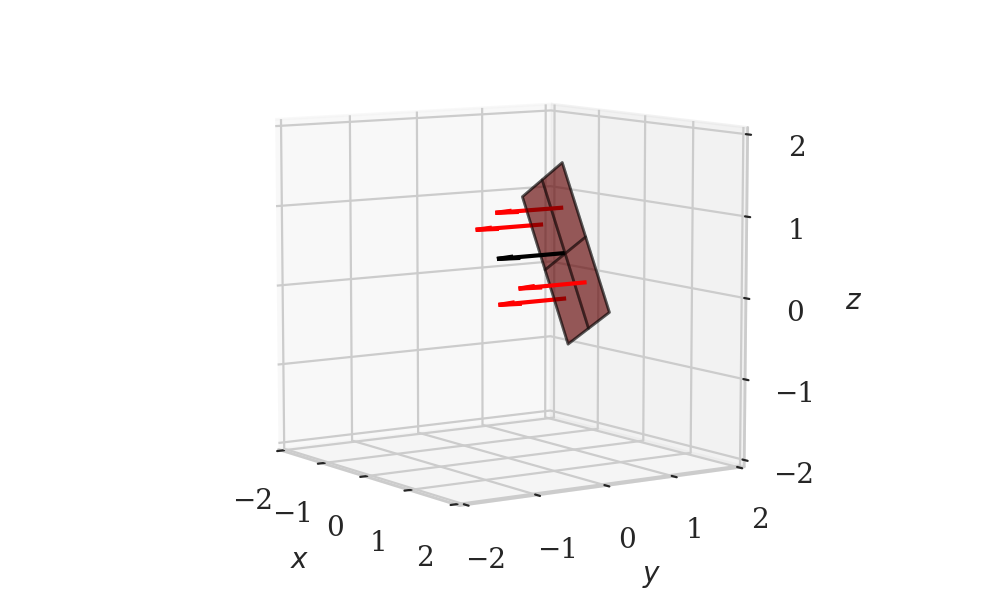

In [10]:
# Original position
polar,az,Rod=90,-90,30 # polar, azimuth, Rodrigues
translation=0.5
v = Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)]))
ctrPoint=np.array(3*[translation])
plane = RectPlane(normalVect=v,ctrPoint=ctrPoint,
    RodriguesAngle=np.deg2rad(Rod),dimensions=[2,1])

subplanes = plane.getPartition(2)
fig,ax = draw(planes=subplanes,
              xlim=[-2,2],ylim=[-2,2],zlim=[-2,2],
             azim=-34,elev=8)
# For reference
draw(figure=fig,axes=ax,planes=plane,
     facecolors='black',colors='black'
    );



## Cube

Similar to the a rectangular plane, a cube is more intuitive to be defined with its normal vector, centerpoint, dimensions and its rotation and translation. 


<IPython.core.display.Javascript object>


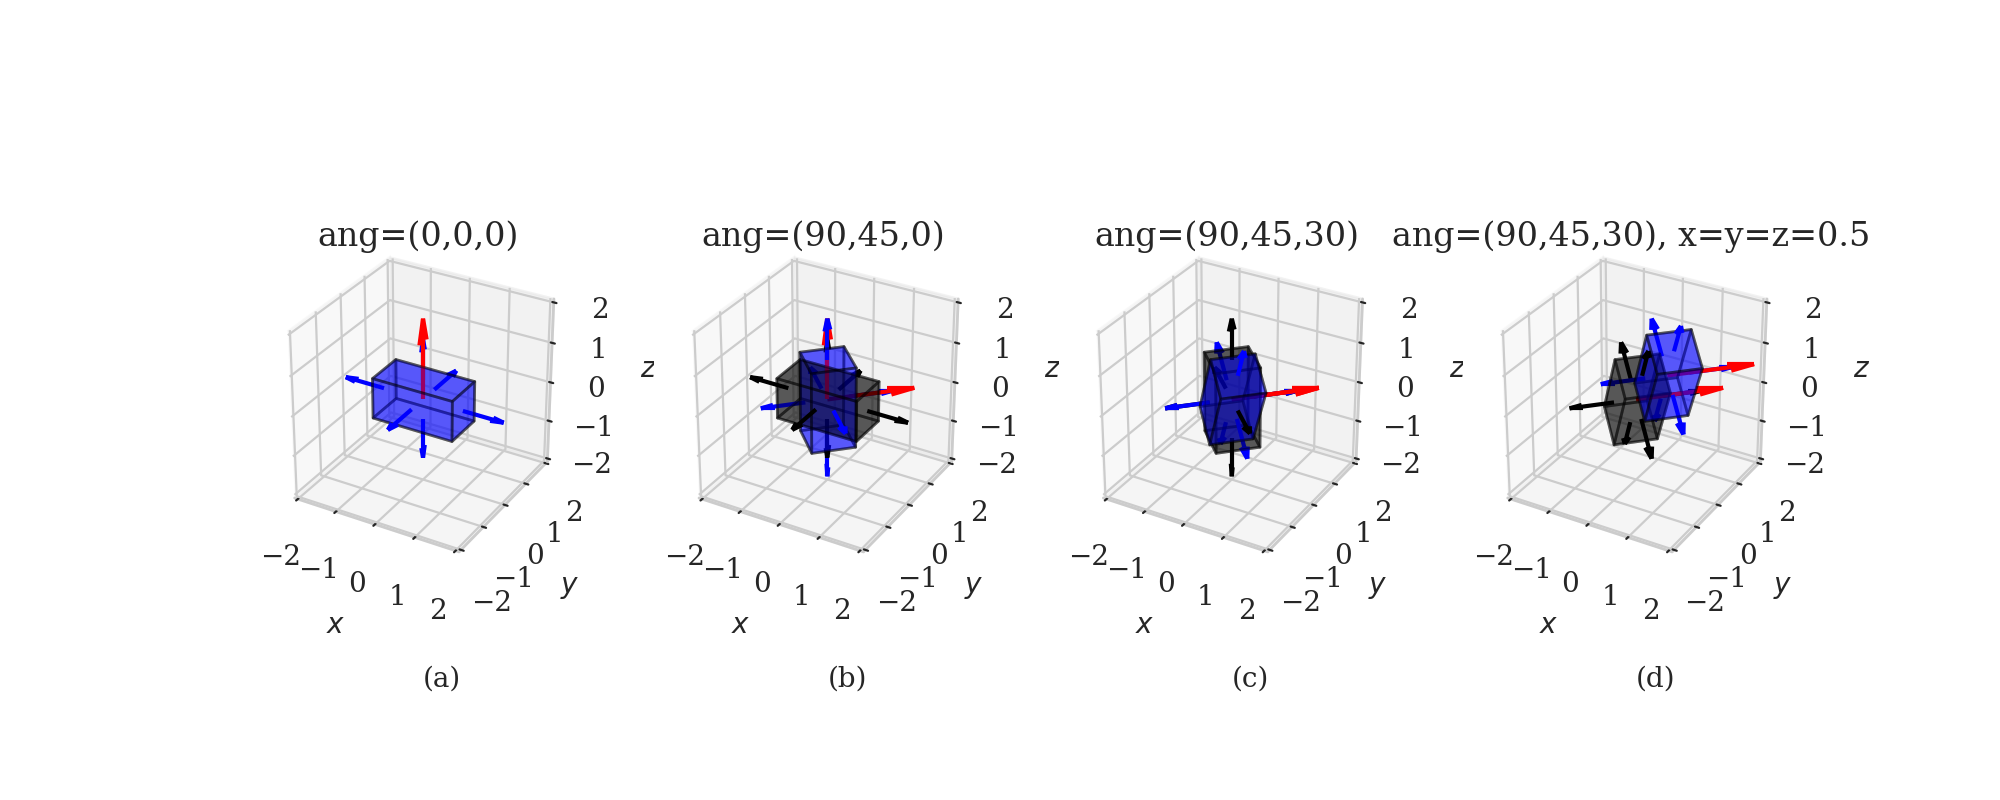

In [11]:
def genCube(polar,az,Rod,ctrPoint):
    
    cube = Cube(
        Vector(np.array([1,np.deg2rad(polar),np.deg2rad(az)])),
        ctrPoint = ctrPoint*np.ones(3),
        dimensions = [2,1,1],
        RodriguesAngle = np.deg2rad(Rod)
    )

    return cube


# Will draw 4 different canvases
fig,axs = draw(subplots=True,figsize=(10,4),nrows=1,ncols=4,xlim=[-2,2],ylim=[-2,2],zlim=[-2,2])

# Original position
polar,az,Rod=0,0,0 # polar, azimuth, Rodrigues
ctrPoint=0
cube = genCube(polar,az,Rod,ctrPoint)

fig,axs[0] = draw(figure=fig,axes=axs[0],cubes=cube,colors='blue',facecolors='blue')
axs[0].set_title("ang=({},{},{})".format(polar,az,Rod))

# Polar and azimuth
# Copy previous object as a reference (black)
fig,axs[1] = draw(figure=fig,axes=axs[1],cubes=cube,colors='black',facecolors='black')

polar,az,Rod=90,45,0 # polar, azimuth, Rodrigues
ctrPoint=0
cube = genCube(polar,az,Rod,ctrPoint)

fig,axs[1] = draw(figure=fig,axes=axs[1],cubes=cube,colors='blue',facecolors='blue')
axs[1].set_title("ang=({},{},{})".format(polar,az,Rod))

# Rodrigues
# Copy previous object as a reference (black)
fig,axs[2] = draw(figure=fig,axes=axs[2],cubes=cube,colors='black',facecolors='black')

polar,az,Rod=90,45,30 # polar, azimuth, Rodrigues
ctrPoint=0
cube = genCube(polar,az,Rod,ctrPoint)

fig,axs[2] = draw(figure=fig,axes=axs[2],cubes=cube,colors='blue',facecolors='blue')
axs[2].set_title("ang=({},{},{})".format(polar,az,Rod))

# Translation
# Copy previous object as a reference (black)
fig,axs[3] = draw(figure=fig,axes=axs[3],cubes=cube,colors='black',facecolors='black')

polar,az,Rod=90,45,30 # polar, azimuth, Rodrigues
ctrPoint=0.5
cube = genCube(polar,az,Rod,ctrPoint)

fig,axs[3] = draw(figure=fig,axes=axs[3],cubes=cube,colors='blue',facecolors='blue')
axs[3].set_title("ang=({},{},{}), x=y=z={}".format(polar,az,Rod,ctrPoint));

axs[0].text(0,0,-8,"(a)");
axs[1].text(0,0,-8,"(b)");
axs[2].text(0,0,-8,"(c)");
axs[3].text(0,0,-8,"(d)");


The descriptions of (a-d) are the same as those in the rectangular plane. Now, we can construct a 3D object like a Minecraft object. We will try to make one later in the next chapter. 

As the cube has 6 faces formed by 6 rectangular planes, we can also do partition to a cube. 

<IPython.core.display.Javascript object>


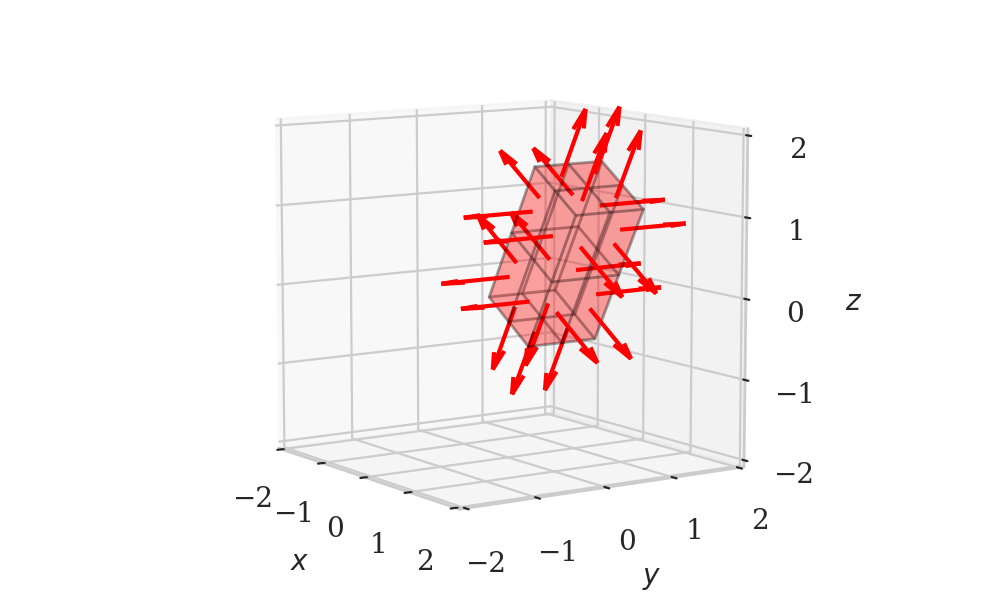

In [12]:
cube = Cube(
    Vector(np.array([1,np.deg2rad(90),np.deg2rad(90)])),
    ctrPoint = np.array([0.5,0.5,0.5]),
    dimensions = [2,1,1],
    RodriguesAngle = np.deg2rad(30)
)
planes = cube.getPartition(2)
fig,ax = draw(planes=planes,alphas=0.2,
              xlim=[-2,2],ylim=[-2,2],zlim=[-2,2],
              azim=-34,elev=9
             )